In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("../Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


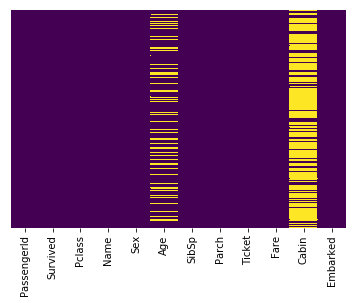

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
sns.set_style('whitegrid')

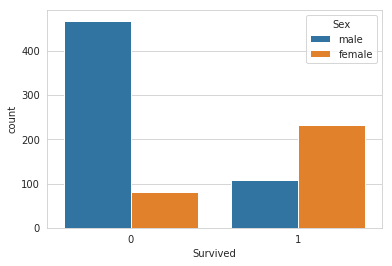

In [7]:
sns.countplot(x='Survived',hue='Sex',data=train)

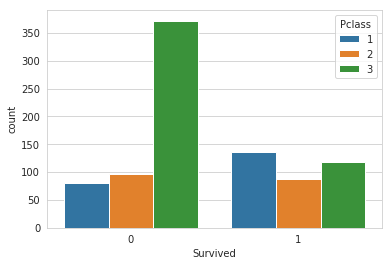

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=train)

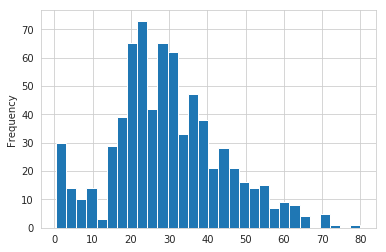

In [9]:
train['Age'].plot.hist(bins=30)

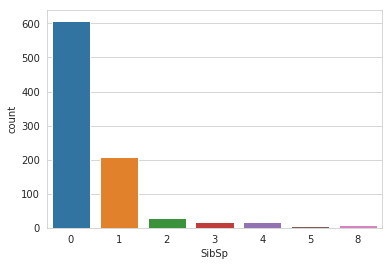

In [10]:
sns.countplot(x='SibSp',data=train)

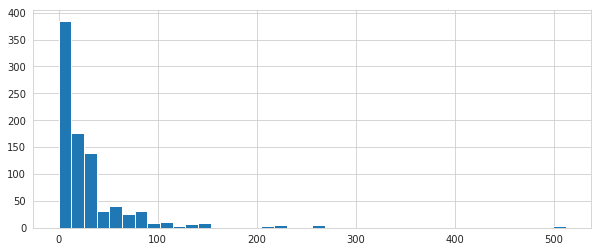

In [11]:
train['Fare'].hist(bins=40,figsize=(10,4))

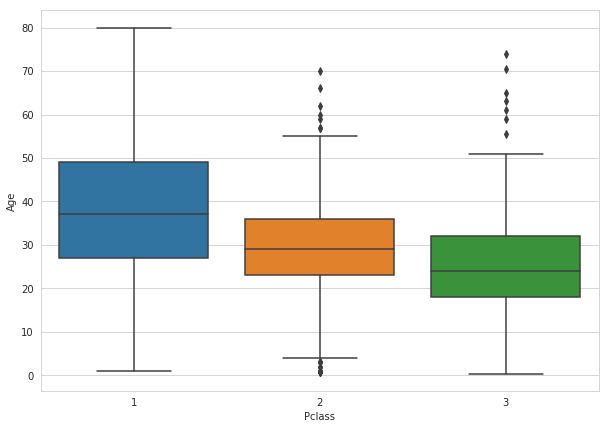

In [12]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)


In [13]:
print(train[train['Pclass'] == 1]['Age'].mean())
print(train[train['Pclass'] == 2]['Age'].mean())
print(train[train['Pclass'] == 3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [14]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 25
        
    else:
        return age
    

In [15]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

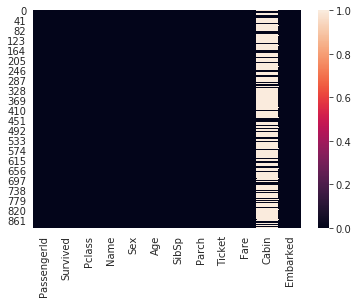

In [16]:
sns.heatmap(train.isnull())

In [17]:
train.drop('Cabin',axis=1,inplace=True)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
pd.isnull(None)

True

In [20]:
train.dropna(inplace=True)

In [32]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [34]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [35]:
train = pd.concat([train,sex,embark],axis=1)

In [36]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1,0,1


In [37]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [41]:
train.head(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.25,1,0,1


In [43]:
train.drop('PassengerId',axis=1,inplace=True)

In [46]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel = LogisticRegression()

In [51]:
logmodel.fit(X_train,y_train)

/home/ak/machine_learn/venv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
predictions = logmodel.predict(X_test)

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       184
           1       0.76      0.71      0.73       110

   micro avg       0.81      0.81      0.81       294
   macro avg       0.79      0.79      0.79       294
weighted avg       0.80      0.81      0.80       294



In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(y_test,predictions)

array([[159,  25],
       [ 32,  78]])